<a href="https://colab.research.google.com/github/veekthorcodes/learning-tensoflow/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-21 07:28:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  30.2MB/s    in 3.5s    

2021-10-21 07:28:47 (30.2 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

# walk through the pizza steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
# Another way of finding out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualizing our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # view random image
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read image and plot with matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (384, 512, 3)


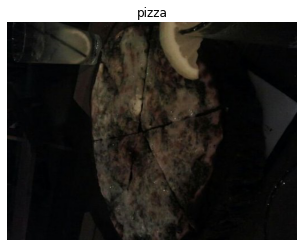

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 3,  4,  6],
        [ 3,  4,  6],
        [ 5,  6,  8],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[ 4,  5,  7],
        [ 4,  5,  7],
        [ 5,  6,  8],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[ 5,  6,  8],
        [ 5,  6,  8],
        [ 5,  6,  8],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7]],

       ...,

       [[13, 13, 15],
        [15, 15, 17],
        [16, 16, 18],
        ...,
        [ 9,  9,  9],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 12],
        [13, 13, 15],
        [16, 16, 18],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 7,  7,  7]],

       [[ 9,  9, 11],
        [12, 12, 14],
        [15, 15, 17],
        ...,
        [11, 11, 11],
        [ 9,  9,  9],
        [ 6,  6,  6]]], dtype=uint8)>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preproccess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from  dirs and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (This is the same as the Tiny VGG from the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 251ms/step - loss: 0.5486 - accuracy: 0.7193 - val_loss: 0.4735 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4384 - accuracy: 0.8020 - val_loss: 0.3627 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3960 - accuracy: 0.8240 - val_loss: 0.3189 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3744 - accuracy: 0.8360 - val_loss: 0.3556 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3377 - accuracy: 0.8507 - val_loss: 0.3102 - val_accuracy: 0.8760


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the  same model as before ( from tensorflow playground )

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics="accuracy")

# Fit the model 
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 1.4402 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Set the seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics="accuracy")

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 4.4084 - accuracy: 0.5953 - val_loss: 1.3380 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.8945 - accuracy: 0.7127 - val_loss: 0.4991 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6814 - accuracy: 0.7353 - val_loss: 1.4769 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7345 - accuracy: 0.7353 - val_loss: 0.6495 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4800 - accuracy: 0.7960 - val_loss: 0.4109 - val_accuracy: 0.8060


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

### Become one with the data

Image shape: (382, 512, 3)
Image shape: (512, 512, 3)


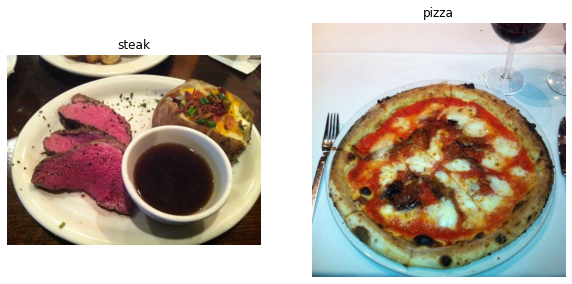

In [ ]:
# visualize data
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory dataset paths 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# Getting the first two images of the first batch
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

0.0

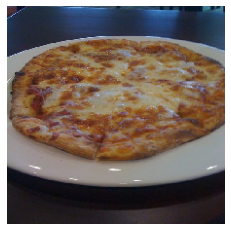

In [ ]:
n = 2
plt.imshow(images[n])
plt.axis("off")
labels[n]

###  Create a CNN Model (start with a baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10,
            kernel_size=3,
            strides=1,
            padding="valid",
            activation="relu",
            input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics="accuracy")

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [ ]:
# check the length of training and test genrators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 252ms/step - loss: 0.8910 - accuracy: 0.6960 - val_loss: 0.4183 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 11s 243ms/step - loss: 0.4199 - accuracy: 0.8173 - val_loss: 0.4568 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.2948 - accuracy: 0.8827 - val_loss: 0.3688 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.1411 - accuracy: 0.9560 - val_loss: 0.4094 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 244ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.5407 - val_accuracy: 0.7860


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.3102 - accuracy: 0.8760


[0.3101968467235565, 0.8759999871253967]

### Evaluate the model

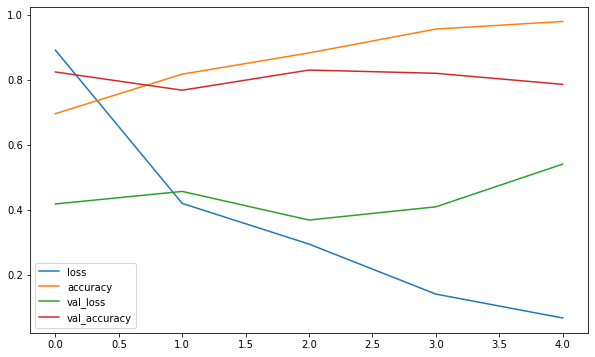

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 6))

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history, figsize):
    """
    Returns seperate loss curves for training and validation metrics.
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=figsize)

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

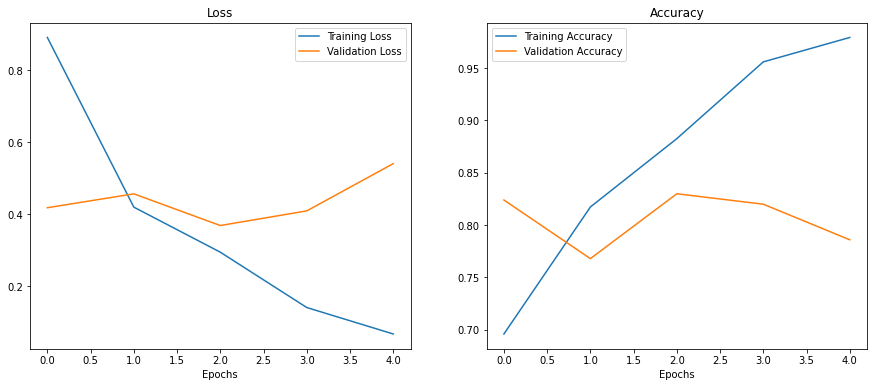

In [ ]:
# check out the loss and accuracy of the loss curves
plot_loss_curves(history_4, (15, 6))

### Adjusting the model parameters

In [ ]:
# Create a model
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6132 - accuracy: 0.6567 - val_loss: 0.4709 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4887 - accuracy: 0.7740 - val_loss: 0.4001 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4280 - accuracy: 0.8067 - val_loss: 0.3628 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4017 - accuracy: 0.8280 - val_loss: 0.4788 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3916 - accuracy: 0.8247 - val_loss: 0.3259 - val_accuracy: 0.8640


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


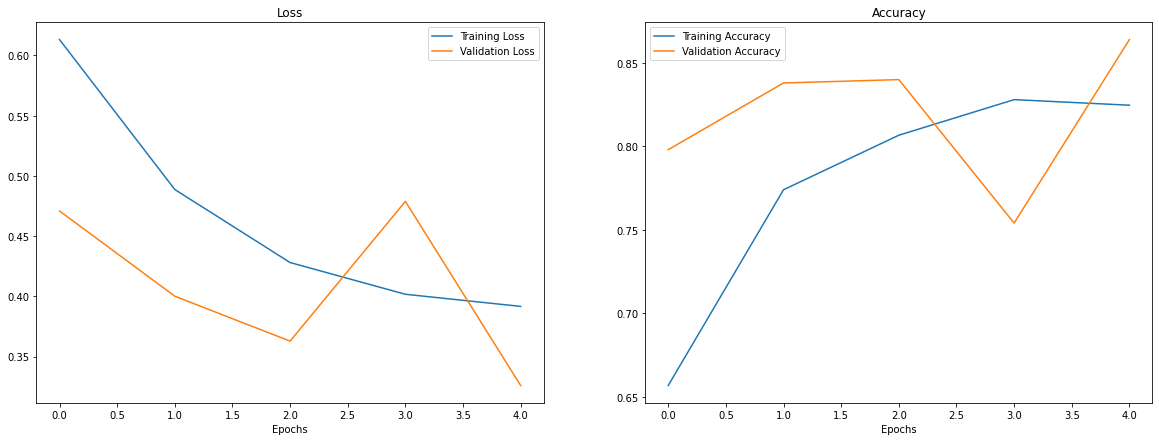

In [ ]:
plot_loss_curves(history_5, (20, 7))

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
 IMG_SIZE = (224, 224)
 # Import data and augment it from training directory
 print("Augmented training data")
 train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    class_mode="binary",
                                                                    batch_size=32,
                                                                    shuffle=False)
 
 # Create non-augmented train data
print("Non Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False)
 
# Create non-augmented test data
print("Non Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample augmented data
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 18


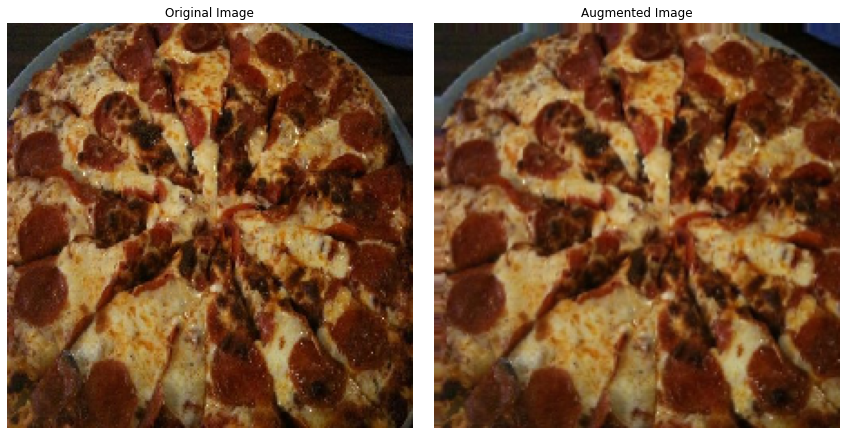

In [ ]:
# show the original and augmented image
import random
random_number = random.randint(0, 32)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
print("Showing image number:", random_number)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis("off")
plt.tight_layout()

In [ ]:
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 559ms/step - loss: 0.7018 - accuracy: 0.5047 - val_loss: 0.6720 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6918 - accuracy: 0.5407 - val_loss: 0.6193 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6562 - accuracy: 0.6313 - val_loss: 0.5964 - val_accuracy: 0.6060
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6241 - accuracy: 0.6407 - val_loss: 0.4990 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6132 - accuracy: 0.6547 - val_loss: 0.4404 - val_accuracy: 0.8380


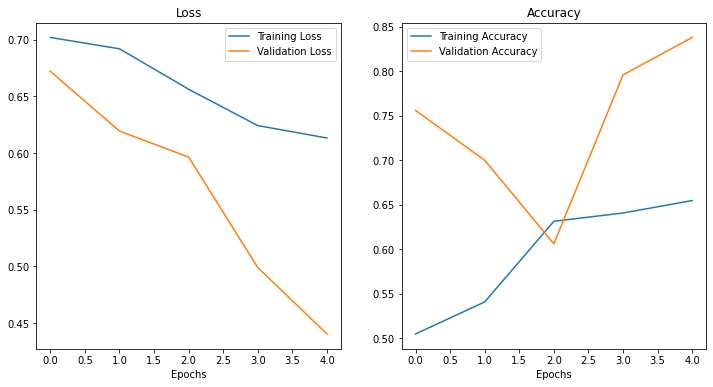

In [ ]:
 plot_loss_curves(history_6, (12, 6))

In [ ]:
# Created training data augmented with shuffled "on"
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                         class_mode="binary",
                                                         target_size=IMG_SIZE,
                                                         batch_size=32,
                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# tf.random.set_seed(42)
model_7 = Sequential([
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6271 - accuracy: 0.6533 - val_loss: 0.5203 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4731 - accuracy: 0.7740 - val_loss: 0.3643 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4122 - accuracy: 0.8180 - val_loss: 0.3554 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3785 - accuracy: 0.8400 - val_loss: 0.3077 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3620 - accuracy: 0.8447 - val_loss: 0.3016 - val_accuracy: 0.8760


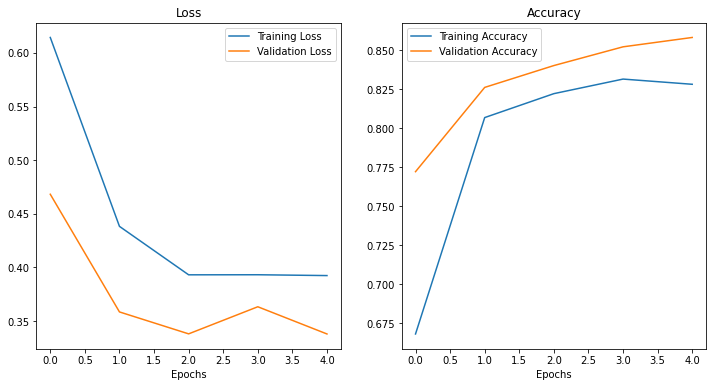

In [ ]:
plot_loss_curves(history_7, (12, 6))

### Making predictions

In [ ]:
print(class_names)

['pizza' 'steak']


--2021-10-21 08:59:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-10-21 08:59:28 (27.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

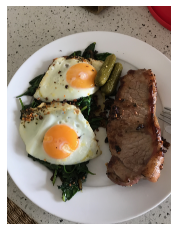

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis("off")

In [ ]:
# Create a function to import an image and resize it to able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads and image from filename, turns it into a tensor
    and reshape it to (img_shape, img_shape, color_channel).
    """

    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the file into a tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale image (normalize image)
    img = img / 255.

    return img 

In [ ]:
# Load and preproces custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0)) 

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports and image located at filename, makes a prediction with model and plots the image
    with the predicted class as the title.
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    class_pred = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Predicted: {pred_class}")
    plt.axis(False)

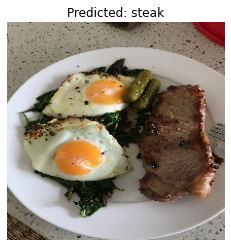

In [ ]:
# Test model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2021-10-21 09:51:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-10-21 09:51:57 (34.8 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



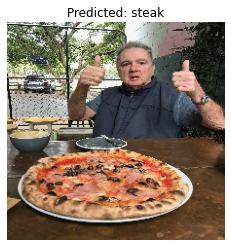

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multiclass image classification

In [ ]:
## Import and become one with the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-22 10:57:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   195MB/s    in 2.5s    

2021-10-22 10:57:09 (195 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get classnames
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


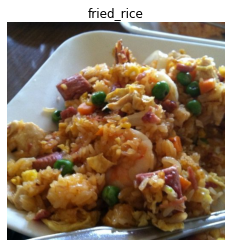

In [ ]:
# visualize

import random 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))